In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("D:/ML_Datasets/framingham.csv")
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
male,4238.0,0.429212,0.495022,0.00,0.00,0.0,1.000,1.0
age,4238.0,49.584946,8.572160,32.00,42.00,49.0,56.000,70.0
education,4133.0,1.978950,1.019791,1.00,1.00,2.0,3.000,4.0
currentSmoker,4238.0,0.494101,0.500024,0.00,0.00,0.0,1.000,1.0
cigsPerDay,4209.0,9.003089,11.920094,0.00,0.00,0.0,20.000,70.0
BPMeds,4185.0,0.029630,0.169584,0.00,0.00,0.0,0.000,1.0
prevalentStroke,4238.0,0.005899,0.076587,0.00,0.00,0.0,0.000,1.0
prevalentHyp,4238.0,0.310524,0.462763,0.00,0.00,0.0,1.000,1.0
diabetes,4238.0,0.025720,0.158316,0.00,0.00,0.0,0.000,1.0
totChol,4188.0,236.721585,44.590334,107.00,206.00,234.0,263.000,696.0


In [4]:
data_std = data.loc[:, data.columns!= "TenYearCHD"].std(axis=0)
data_mean = data.loc[:, data.columns!= "TenYearCHD"].mean(axis=0)

data1 = (data.loc[:, data.columns!="TenYearCHD"] - data_mean)/data_std

data1["TenYearCHD"] = data["TenYearCHD"]
print(data1)

          male       age  education  currentSmoker  cigsPerDay   BPMeds  \
0     1.153056 -1.234805   1.981828      -0.988154   -0.755287 -0.17472   
1    -0.867056 -0.418208   0.020642      -0.988154   -0.755287 -0.17472   
2     1.153056 -0.184895  -0.959952       1.011749    0.922552 -0.17472   
3    -0.867056  1.331643   1.001235       1.011749    1.761472 -0.17472   
4    -0.867056 -0.418208   1.001235       1.011749    1.174228 -0.17472   
...        ...       ...        ...            ...         ...      ...   
4233  1.153056  0.048419  -0.959952       1.011749   -0.671395 -0.17472   
4234  1.153056  0.165076   1.001235       1.011749    2.852067 -0.17472   
4235 -0.867056 -0.184895   0.020642       1.011749    0.922552      NaN   
4236 -0.867056 -0.651521  -0.959952       1.011749    0.503093 -0.17472   
4237 -0.867056  0.281732   0.020642      -0.988154   -0.755287 -0.17472   

      prevalentStroke  prevalentHyp  diabetes   totChol     sysBP     diaBP  \
0           -0.07702

In [5]:
data1 = data.replace(np.nan, 0)

sd_totChol = np.std(data1["totChol"])
sd_sysBP = np.std(data1["sysBP"])
sd_diaBP = np.std(data1["diaBP"])
sd_glucose = np.std(data1["glucose"])
sd_heartRate = np.std(data1["heartRate"])
sd_age = np.std(data1["age"])
sd_cigsPerDay = np.std(data1["cigsPerDay"])
sd_BMI = np.std(data1["BMI"])

mn_totChol = np.mean(data1['totChol'])
mn_sysBP = np.mean(data1['sysBP'])
mn_diaBP = np.mean(data1['diaBP'])
mn_glucose = np.mean(data1['glucose'])
mn_heartRate = np.mean(data1['heartRate'])
mn_age  = np.mean(data1['age'])
mn_cigsPerDay = np.mean(data1['cigsPerDay'])
mn_BMI = np.mean(data1['BMI'])


data1["totChol"] = (data1["totChol"] - mn_totChol)/sd_totChol
data1["sysBP"] = (data1["sysBP"] - mn_sysBP)/sd_sysBP
data1["diaBP"] = (data1["diaBP"] - mn_diaBP)/sd_diaBP
data1["glucose"] = (data1["glucose"] - mn_glucose)/sd_glucose
data1["heartRate"] = (data1["heartRate"] - mn_heartRate)/sd_heartRate
data1["age"] = (data1["age"] - mn_age)/sd_age
data1["cigsPerDay"] = (data1["cigsPerDay"] - mn_cigsPerDay)/sd_cigsPerDay
data1["BMI"] = (data1["BMI"] - mn_BMI)/sd_BMI


print(data1)

      male       age  education  currentSmoker  cigsPerDay  BPMeds  \
0        1 -1.234951        4.0              0   -0.751322     0.0   
1        0 -0.418257        2.0              0   -0.751322     0.0   
2        1 -0.184916        1.0              1    0.929210     0.0   
3        0  1.331800        3.0              1    1.769476     0.0   
4        0 -0.418257        3.0              1    1.181289     0.0   
...    ...       ...        ...            ...         ...     ...   
4233     1  0.048425        1.0              1   -0.667296     0.0   
4234     1  0.165095        3.0              1    2.861821     0.0   
4235     0 -0.184916        2.0              1    0.929210     0.0   
4236     0 -0.651598        1.0              1    0.509077     0.0   
4237     0  0.281766        2.0              0   -0.751322     0.0   

      prevalentStroke  prevalentHyp  diabetes   totChol     sysBP     diaBP  \
0                   0             0         0 -0.760870 -1.195907 -1.082625   
1

<Axes: xlabel='TenYearCHD'>

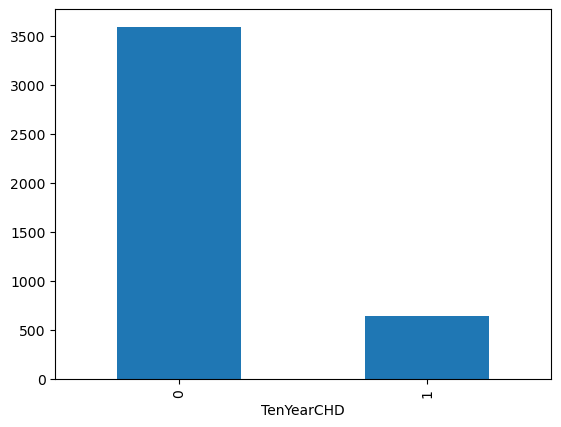

In [6]:
data.pivot_table(index='TenYearCHD', aggfunc='size').plot(kind='bar')

In [7]:
train_data = data1.sample(frac = 0.6, random_state = 42)
#output_train = data['Price'].sample(frac = 0.6, random_state=42)

test_val_data = data1.drop(train_data.index)
#output_test_val = data['Price'].drop(output_train.index)

val_data = test_val_data.sample(frac = 0.5, random_state = 42)
#output_val = output_test_val.sample(frac = 0.5, random_state = 42)

test_data = test_val_data.drop(val_data.index)
#output_test = output_test_val.drop(output_val.index)

<Axes: xlabel='TenYearCHD'>

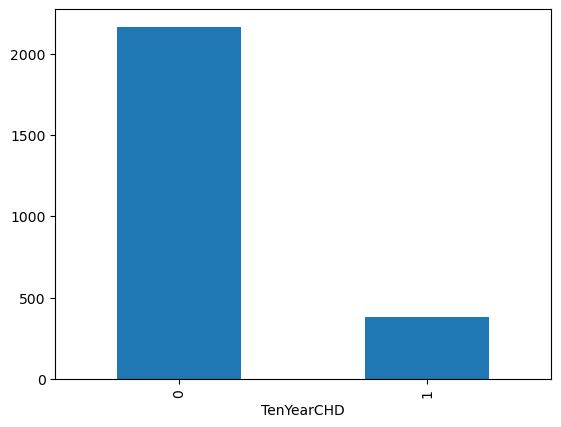

In [8]:
train_data.pivot_table(index='TenYearCHD', aggfunc='size').plot(kind='bar')

<Axes: xlabel='TenYearCHD'>

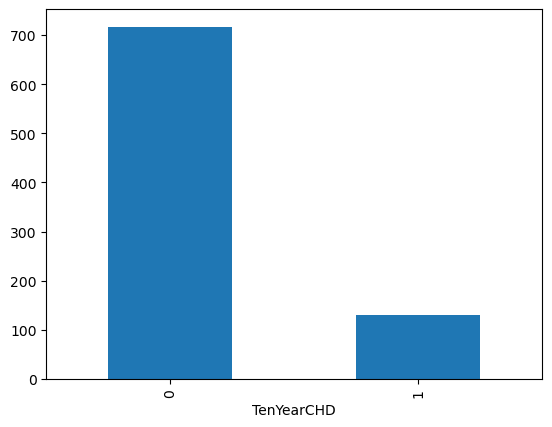

In [9]:
val_data.pivot_table(index='TenYearCHD', aggfunc='size').plot(kind='bar')

<Axes: xlabel='TenYearCHD'>

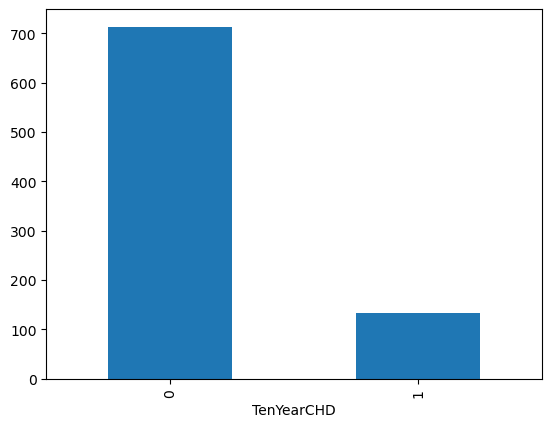

In [10]:
test_data.pivot_table(index='TenYearCHD', aggfunc='size').plot(kind='bar')

In [10]:
from imblearn.over_sampling import SMOTE
train_data = train_data.fillna(0)
x_resampled, y_resampled = SMOTE().fit_resample(train_data.iloc[:, 0:-1], train_data['TenYearCHD'])

<Axes: title={'center': 'Class distribution after appying SMOTE'}, xlabel='TenYearCHD'>

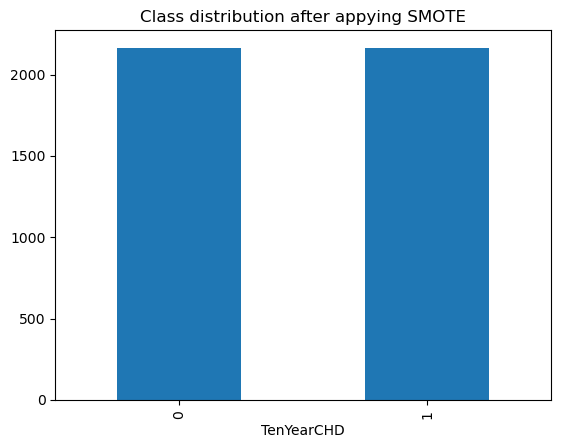

In [25]:
pd.Series(y_resampled).value_counts().plot(kind='bar', title='Class distribution after appying SMOTE', xlabel='TenYearCHD')

In [11]:
val_data = val_data.fillna(0)
x_val_re, y_val_re = SMOTE().fit_resample(val_data.iloc[:, 0:-1], val_data['TenYearCHD'])

<Axes: title={'center': 'Class distribution after appying SMOTE'}, xlabel='TenYearCHD'>

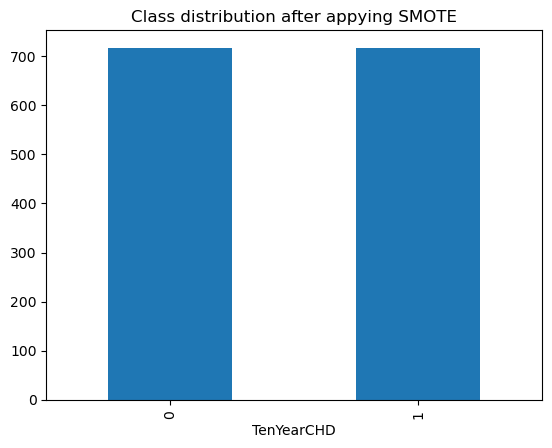

In [12]:
pd.Series(y_val_re).value_counts().plot(kind='bar', title='Class distribution after appying SMOTE', xlabel='TenYearCHD')

In [13]:
test_data = test_data.fillna(0)
x_test_re, y_test_re = SMOTE().fit_resample(test_data.iloc[:, 0:-1], test_data['TenYearCHD'])

<Axes: title={'center': 'Class distribution after appying SMOTE'}, xlabel='TenYearCHD'>

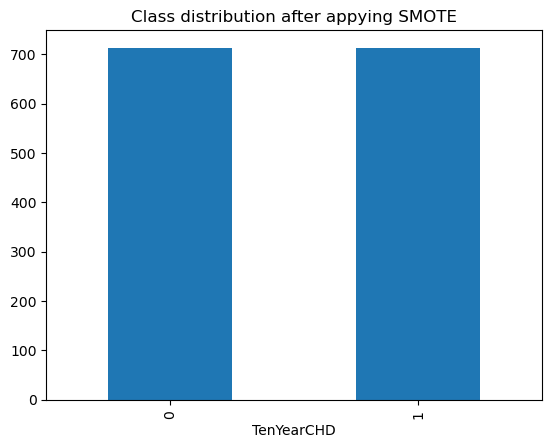

In [14]:
pd.Series(y_test_re).value_counts().plot(kind='bar', title='Class distribution after appying SMOTE', xlabel='TenYearCHD')

In [30]:
print(y_resampled[2004:])

2004    1
2005    0
2006    0
2007    0
2008    1
       ..
4323    1
4324    1
4325    1
4326    1
4327    1
Name: TenYearCHD, Length: 2324, dtype: int64


In [15]:
X_train = np.array(x_resampled)
Y_train = np.array(y_resampled)

X_val = np.array(x_val_re)
Y_val = np.array(y_val_re)

X_test = np.array(x_test_re)
Y_test = np.array(y_test_re)

print(X_train)

[[ 1.15305584  1.56495614 -0.95995181 ...  0.32547948 -0.32252881
   0.16833251]
 [ 1.15305584 -0.5348647   1.00123495 ...  0.53380714  0.75840878
   0.04312382]
 [-0.86705605  0.16507558 -0.95995181 ... -1.36320005 -0.07308167
   0.58569482]
 ...
 [ 1.15305584  0.1206652   1.98182834 ...  0.83779102  0.20801971
   0.01641693]
 [ 1.15305584  0.0577599  -0.94424804 ...  0.60278598 -0.65645658
   0.48484429]
 [-0.86705605 -0.53047254  1.00123495 ... -0.91975162 -1.20527784
   0.        ]]


In [41]:
def logistic_reg(x, y, w, b, lam):
    m = x.shape[0]
    j=0
    z = np.dot(x, w) + b
    #for i in range(0, m):
    s = 1/(1 + np.exp(-z))
    s[s >= 0.5] = 1
    s[s < 0.5] = 0
    #print(s)
    a = np.mean(w**2)

    
    j = np.mean((s[:, 0] - y))
    j = j + (lam*a)/(m)
    
    from sklearn import metrics

    
    
    confusion_matrix = metrics.confusion_matrix(y, s)

    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

    cm_display.plot()
    plt.show()

    
        
    return j

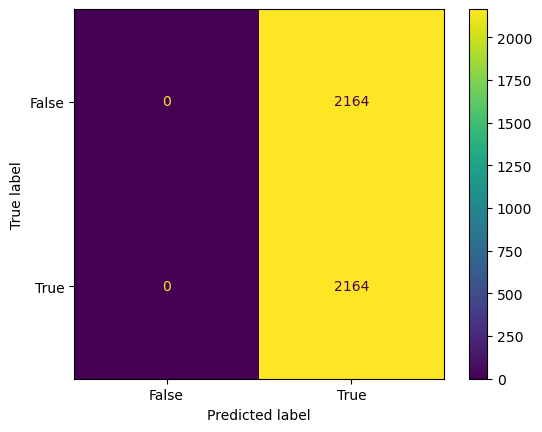

0.5


In [42]:
n = X_train.shape[1]
w = np.zeros([n, 1])
b = 0

cost = logistic_reg(X_train, Y_train, w, b, 10)
print(cost)

In [43]:


def logistic_grad(x, y, w, b):
    m = x.shape[0]
    dz_dw = 0
    dz_db = 0
    a = np.zeros([m])
    
    z = np.dot(x, w) + b 
    #for i in range(0, m):
    #print(z)
    s = 1/(1 + np.exp(-z))
    #print(y[0])
    #print(s.shape)    
    s[s >= 0.5] = 1
    s[s < 0.5] = 0
        
    #print("------------------------------------------------------------")
    #y_new = y.transpose()
    
    
    
    for i in range(0, m):
        a[i] = s[i][0] - y[i]
    #print(a.shape)
    
    #print(y_new)
    dz_dw = np.dot(a, x)
    dz_dw = dz_dw/m
    #dz_dw = np.mean(dz_dw)
    #print(dz_dw)
    dz_db = np.mean(a)
    
        
    
        
        
    return dz_dw, dz_db

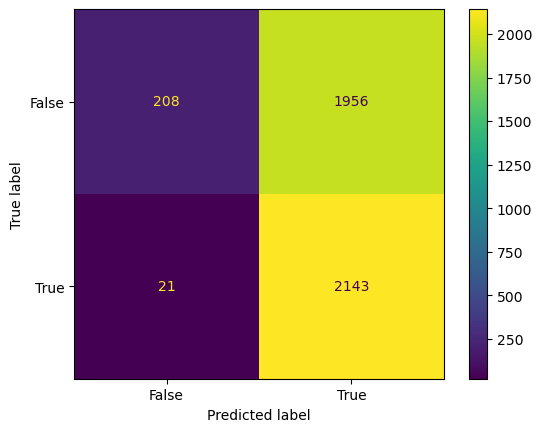

0.44710042663855254
[[ 0.06109302]
 [ 0.09865883]
 [-0.04115159]
 [ 0.05417848]
 [ 0.06738622]
 [ 0.06276115]
 [ 0.0644831 ]
 [ 0.11687033]
 [ 0.08363353]
 [ 0.03736278]
 [ 0.11445639]
 [ 0.07738904]
 [ 0.02836816]
 [ 0.02393583]
 [ 0.05216221]]
0.5121048983364463


In [44]:
n = X_train.shape[1]
#print(n)
w = np.zeros([n, 1])
b = 1
m = X_train.shape[0]

def logistic_model(x, y, w, b):
    for i in range(0, 1000):
        w1, b1 = logistic_grad(X_train, Y_train, w, b)
    #print("b1 =", b)
        w1= np.array(w1)
        w1 = np.reshape(w1, (-1,1))
        b1 = b1.transpose()
        w = w - ((w1 * 0.001)+ (10/m)*w1)
        b = b - (b1 * 0.001)
    return w,b
    

w1, b1 = logistic_model(X_train, Y_train, w, b)

cost = logistic_reg(X_train, Y_train, w1, b1, 10)
print(cost)
print(w1)
print(b1)

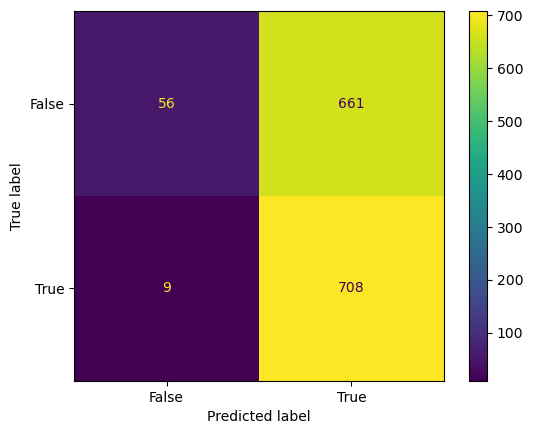

0.4547075638017122


In [45]:
w1, b1 = logistic_model(X_val, Y_val, w, b)

cost = logistic_reg(X_val, Y_val, w1, b1, 10)
print(cost)

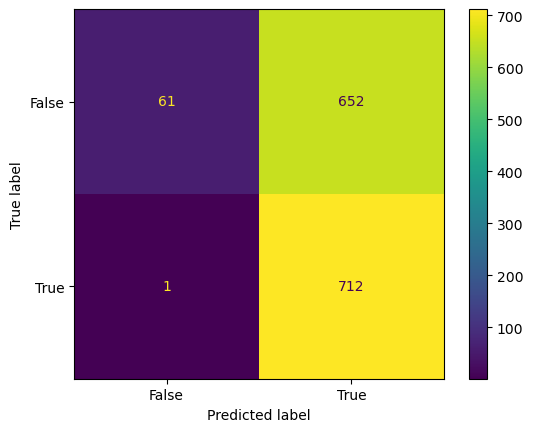

0.4565217746469086


In [46]:
w1, b1 = logistic_model(X_test, Y_test, w, b)

cost = logistic_reg(X_test, Y_test, w1, b1, 0.01)
print(cost)